# Video Games Sales Analysis

<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/04/gHUHJvVwFhkYKMXcAyASWX.jpg" alt="VideoGames">

Video games have undeniably become an imperative part of most of our life, either as a form of entertainment and even hobby. Video games came into existence through the invention of the Cathode Ray Tube Amusement Device by Thomas T Goldsmith Jr. and Estle Ray Mann in 1947. And in 1948 they got the patent for their invented device with knobs and buttons used for stimulating airborne enemies. It was not until the 1970s, and 1980s those video games reached the mainstream popularity.

One of the biggest technological evolution examples is that of what is seen in video games. Over the years there had been massive changes and several creations since the first released video game. Before the age of Playstation, Xbox, or even computer games, people used to be engrossed in playing video arcade games and later the 8-bit video games using consoles, joysticks, and other controllers. Now we have video games with much higher graphics, better storyline, and even more options. This makes the gaming experience more thrilling and enjoyable; however, it does not change the fact that video games have turned almost an entire generation into couch potatoes.

In this project we are going to analyze the sales of some video games using Data Visualisation and python.
This is the final project for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com)


## Downloading the Dataset

We are going to download [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales) from Kaggle using `opendatasets` module of python and we are going to load data into pandas dataframe.
Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. 

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

We are going to analyse this data and find relationships between fileds and draw some meaningful insights from the data.


Let us start by downloading the dataset from kaggle

In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\videogamesales" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

## Data Preparation and Cleaning

Now we are going to load data into pandas dataframe and explore through the data like finding no of rowsa and columns are present, their ranges etc. We will also handle missing data if any present.



In [6]:
total_path=data_dir+'/vgsales.csv' ## Total path to the csv file

In [7]:
import pandas as pd

In [8]:
game_sales=pd.read_csv(total_path)

In [9]:
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
game_sales.shape

(16598, 11)

In [11]:
print(f"The dataset has {game_sales.shape[0]} different games and each game has {game_sales.shape[1]} fileds asscosiated with")

The dataset has 16598 different games and each game has 11 fileds asscosiated with


In [12]:
game_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

As we can see there are 271 missing values in Year and 58 missing values in Publisher.They might not be able to get this information or forgot filling this data.

Usually we fill the missing data of numerical columns with mean or median and categorical columns with the most repeated values, but here we have 271+58 missing data which is pretty low compared to the total no of rows the dataset has i.e. 16598. So we will drop these columns.

In [13]:
game_sales.dropna(subset=["Year","Publisher"],inplace=True)

In [14]:
game_sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

All the missing data has been dealt with.Remeber that we only dropped the entries with null values because we have plenty of data to work with.When the null values number is high or the no of rows available for work  are less we have to impute the missing values with appropriate strategy i.e mean or median or most_frequent

In [15]:
game_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Exploratory Analysis and Visualization

We are going to visualise data from different features and find if there is any connection to eachother using histograms, barplots etc.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Lets see the numerical stastics of the data

In [17]:
game_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Now as we see the rank has least value 1 i.e the game with rank 1 and has highest value 16600 i.e the game ranked in the last. Everything seems ok for this column.

We can also see that the range of years of these games is 1980 to 2020.

As for the columns sales we can see most of them has min values as 0 which means that certain game wasnt sold anything in that particular region. There maybe many reasons for this such as the game may sucks, or there is another game of same type with better features or the production companies havent released that game in that particular region.


But an intresting thing we can see is that the difference b/w 75% quartile and max is pretty high for all the sales columns,Further investigation is required for this or maybe we can get a reason of it in visualisation.

In [18]:
game_sales.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

As we can see there are only 11325 different names , which means there might be duplicate data,But we can see there are different ranks for each game, so they may be games having samenames

We can see there are 31 differenet platforms where games are released and this dataset contains 12 different generes of games  and there are 576 different publishers


In [19]:
print("Available genres of games are : ",game_sales['Genre'].unique().tolist())

Available genres of games are :  ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']


In [20]:
print("Available Platforms for games are : ",game_sales['Platform'].unique().tolist())

Available Platforms for games are :  ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


In [21]:
game_sales.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


Text(0.5, 1.0, 'Correlation')

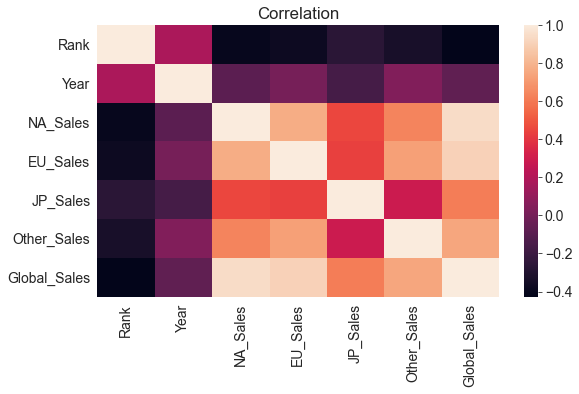

In [22]:
sns.heatmap(game_sales.corr())
plt.title("Correlation")

As we can see sales in one region are pretty much releated to sales in onther regions positevly. Lets start visualising the data

#### Let us first see The Global Sales throughout the years

Text(0.5, 1.0, 'Year Vs Global Sales')

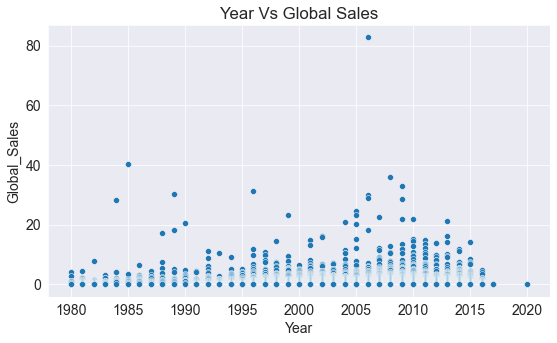

In [23]:
sns.scatterplot(data=game_sales,x='Year',y='Global_Sales')
plt.title("Year Vs Global Sales")

With increase in years there is a slght increase in Gloabal_Sales. Also, we can see there are very less sales b/w 2015 to 2020.It may because the data might be missing or those games havent made to the list which is also possible.

####  North America vs Global Sales

Text(0.5, 1.0, 'North America Sales vs Global Sales')

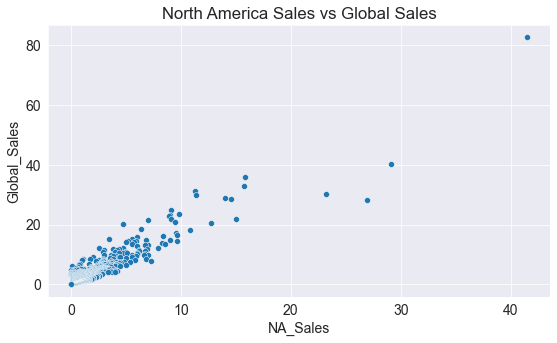

In [24]:
sns.scatterplot(data=game_sales,
    x='NA_Sales',
    y='Global_Sales')
plt.title("North America Sales vs Global Sales")

As we can see most of the game mostly all game made around 10 million in North America, whereas it is around 20 million in The Global,which means North America contributes around 50% of global data.

####  Japan Sales Vs Global Sales

Text(0.5, 1.0, 'Europe Sales vs Global Sales')

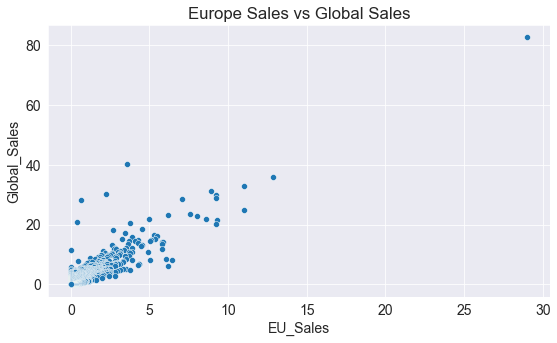

In [25]:
sns.scatterplot(data=game_sales,
    x='EU_Sales',
    y='Global_Sales')
plt.title("Europe Sales vs Global Sales")

As we can see most of the game mostly all game made around 5 million in Japan, whereas it is around 20 million in The Global,which means North America contributes around 20% of global data.

#### Europe Sales vs Global Sales

Text(0.5, 1.0, 'Europe Sales vs Global Sales')

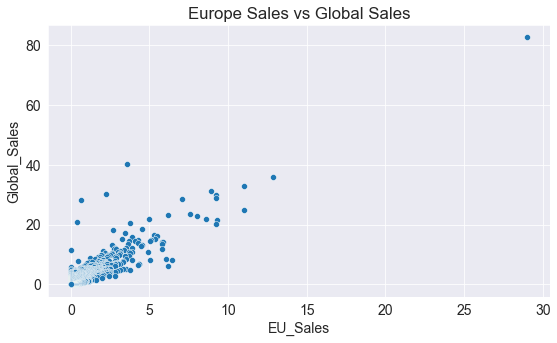

In [26]:
sns.scatterplot(data=game_sales,
    x='EU_Sales',
    y='Global_Sales')
plt.title("Europe Sales vs Global Sales")

As we see most of games in Europe made 5 million ,where global has 20 million. It indicates that europe contrinutes for around 25% of global sales

####   Different Genre games

<AxesSubplot:xlabel='Genre', ylabel='Count'>

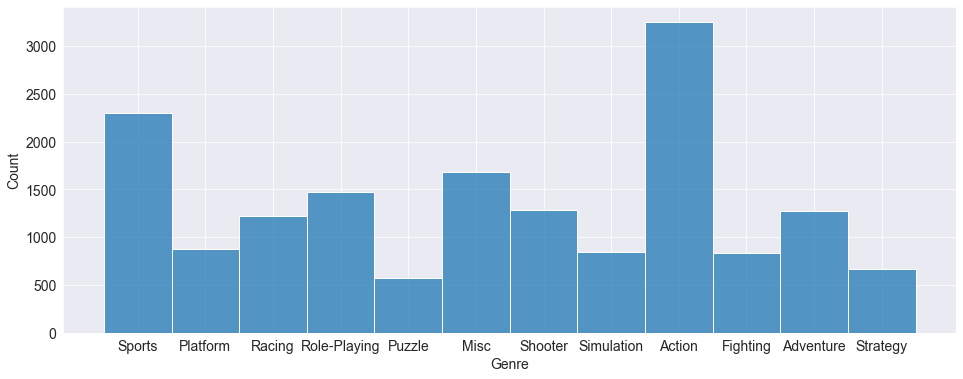

In [27]:
plt.figure(figsize=(16,6))
sns.histplot(data=game_sales,x='Genre')

As we can see Action Games are most available,which was well-known, Sports follows it and Misc genre is 3 place as most no of games

It is clear that on an average Europe Contributes 25% and Japan Contributes 20% , North America contributes 50%  and other sales contribute 5% to the total sales.

## Asking and Answering Questions

Let us try to answer some questions based on the data we have.


#### Q1:Which Publisher made more money in North America ?

In [28]:
na_df=game_sales.groupby(by="Publisher")['NA_Sales'].sum()
na_df.sort_values(ascending=False)

Publisher
Nintendo                       815.75
Electronic Arts                584.22
Activision                     426.01
Sony Computer Entertainment    265.22
Ubisoft                        252.81
                                ...  
Gainax Network Systems           0.00
Pow                              0.00
Princess Soft                    0.00
Prototype                        0.00
Riverhillsoft                    0.00
Name: NA_Sales, Length: 576, dtype: float64

As we can see `Nintendo` made highest sales in `North America` which is **815.75 million dollars**,followed by `Electronic Arts` with **584.22 million dollars**.

Groupby function groups the dataset with the given column and then we can perform whatever operation we want.Here we used **groupby** to group the dataframe by `Publisher` column and then we calculated the sum of `NA_Sales` columns.

#### Q2: Which Genre Games made more money in Japan ?

In [29]:
jp_df=game_sales.groupby(by="Genre")['JP_Sales'].sum()

In [30]:
new=jp_df.sort_values(ascending=False)
new

Genre
Role-Playing    350.29
Action          158.65
Sports          134.76
Platform        130.65
Misc            106.67
Fighting         87.15
Simulation       63.54
Puzzle           56.68
Racing           56.61
Adventure        51.99
Strategy         49.10
Shooter          38.18
Name: JP_Sales, dtype: float64

c:\users\shannu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre'>

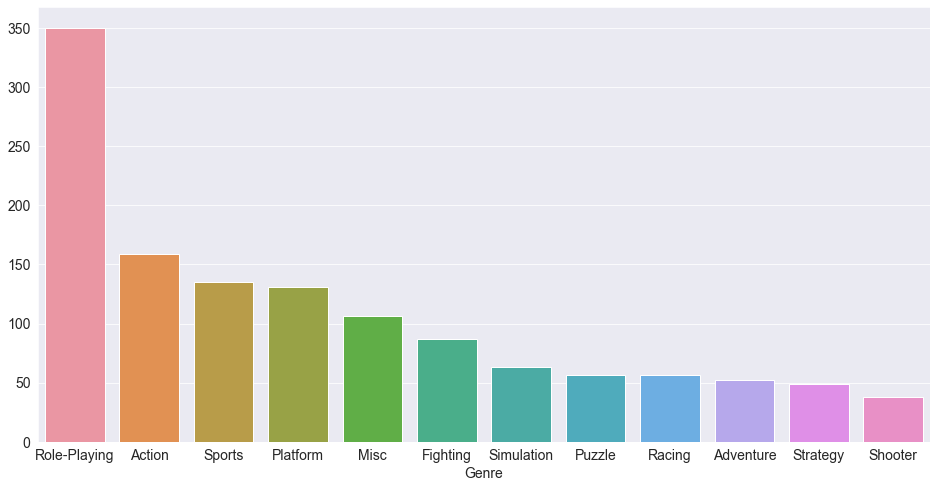

In [31]:
plt.figure(figsize=(16,8))
sns.barplot(new.index,new.values)

We can see `Role-Playing` genre made the most in `Japan` i.e **350.29 million dollars**, followed by `Adventure` games with **158.65 million dollars**.

Here we used **groupby** to group the dataframe by `Genre` column and then we calculated the sum of `JP_Sales` columns

#### Q3:Which Game made highest sales in the year 2012 ?

In [32]:
game_df=game_sales[game_sales.Year==2012].sort_values(by="Global_Sales",ascending=False)

In [33]:
game_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
64,65,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.07,2.47,0.63,9.82
65,66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76
73,74,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.09
...,...,...,...,...,...,...,...,...,...,...,...
16081,16084,Pro Angler Moves,PS3,2012.0,Sports,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01
16014,16017,Nobunaga no Yabou Online: Houou no Shou,PS3,2012.0,Strategy,Ackkstudios,0.00,0.00,0.01,0.00,0.01
15996,15999,Captain Morgane and the Golden Turtle,Wii,2012.0,Adventure,Reef Entertainment,0.00,0.01,0.00,0.00,0.01
15993,15996,Blazblue: Continuum Shift Extend,PSP,2012.0,Fighting,Arc System Works,0.00,0.00,0.01,0.00,0.01


In the year `2012` *655* games are released out of which `PS3 version of Call of Duty: Black Ops II` made most i.e. **14.03 Million dollars** followed by `X360 version of Call of Duty: Black Ops II` which made **13.73 Mil $**.


Here we selected all the rows where year is 2012 and then sorted those values based on `Global_Sales` and selected the first one


#### Q4: Which platform hosts more number of games ?

In [34]:
platform_df=game_sales.groupby(by="Platform")["Name"].count()

In [35]:
new1=platform_df.sort_values(ascending=False)
new1

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

c:\users\shannu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform'>

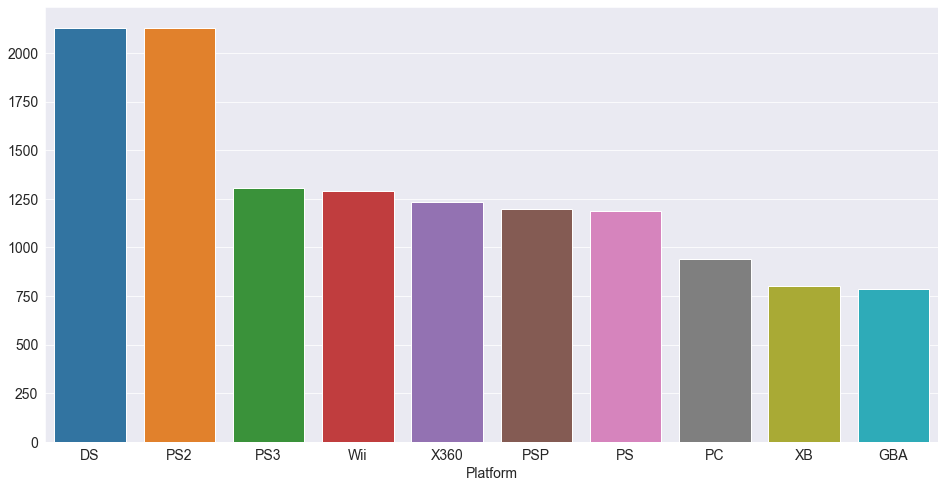

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(new1.index[:10],new1.values[:10])

As we can see a Platform named `DS` hosts more number of games i.e. `2131 games`, followed by `PS2 with 2127 games`.

Here we used **groupby** to group the dataframe by `Platform` column and then we calculated the count of `Names` columns to get count of no of games

#### Q5: List of games that are released after 2010 and made more than 7 million dollars in europe ?

In [37]:
new_df=game_sales[(game_sales['EU_Sales']>7.0) & (game_sales['Year']>2010)]

In [38]:
new_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.4


It seems that `Grand Theft Auto V` is the only game that was released after year 2010 and made more than 7 million i.e 9.27 million dollars.

Here we applied conditional statements EU_Sales > 7 mil and Year = 2010 and got the desired result.

As seen, We can also find answers to different questions using numpy and pandas functions or using visualisation.

## Inferences and Conclusion


We have analysed the dataset and drewn few conclusions, answered some questions.Lets just have a small recap

<ul>
    <li>Based on the exploratory analysis we have seen that on an average Japan sales contribute 20%, Europe sales Contribute 25% and North America sales contribute 50% and other sales are around 5%.</li>
    <li>We have seen how to answer questions such as how to calculate most sold genres, which platform hosts more no of games and etc.</li>
    <li>We have also seen that Action is the most sold genre around the globe.</li>
    <li>Whereas Role-Playing is the most famous genre in Japan.</li>
    <li>Like that we can also find most popular genre in different regions simply by using group by function.</li>
</ul>
In conclusion, we can find answers to intresting questions and insights using numpy and pandas functions and we use them for reference such as

 1. What type of game has highest scope in japan ? Ans:Role-Playing and Action
 
 2. Which type of genre has highest economy collection ? Ans:Action etc.
 
 3. Which Publisher we should choose while releasing a game in North America ? Ans : 
 
 
We can answer these real-life questions with the analysis we performed today and use them as the references for investments and provide inputs to Game Creation Companies to boost their sales.

## References and Future Work

Chech out the following Rescources to learn more about dataset or modules of python

<ol>
    <li> Game Sales Dataset   :
        https://www.kaggle.com/gregorut/videogamesales  </li>
    <li> Pandas User Guide    : 
        https://pandas.pydata.org/docs/user_guide/index.html </li>
    <li> Seaborn User Guide   :
        https://seaborn.pydata.org/tutorial.html </li>
    <li> Opendatasets library : 
        https://github.com/JovianML/opendatasets</li>
</ol>

Have a Good Day😀